In [4]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from sklearn import datasets

In [5]:
diabetes = datasets.load_diabetes()
 https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt

In [24]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [19]:
data=pd.DataFrame(data=diabetes.data,    # values
            #index=diabetes.feature_names,    # 1st column as index
            columns=diabetes.feature_names)
data["target"]=diabetes.target

In [20]:
data.head()
#s1-6 are serum levels, more info at http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf
#In the tab delimited file above, the variables are named
#age sex bmi map tc ldl hdl tch ltg glu target

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [84]:
#Data has already been standardised using The dataset in scikit-learn is standarized (zero mean and unit L2 norm).
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


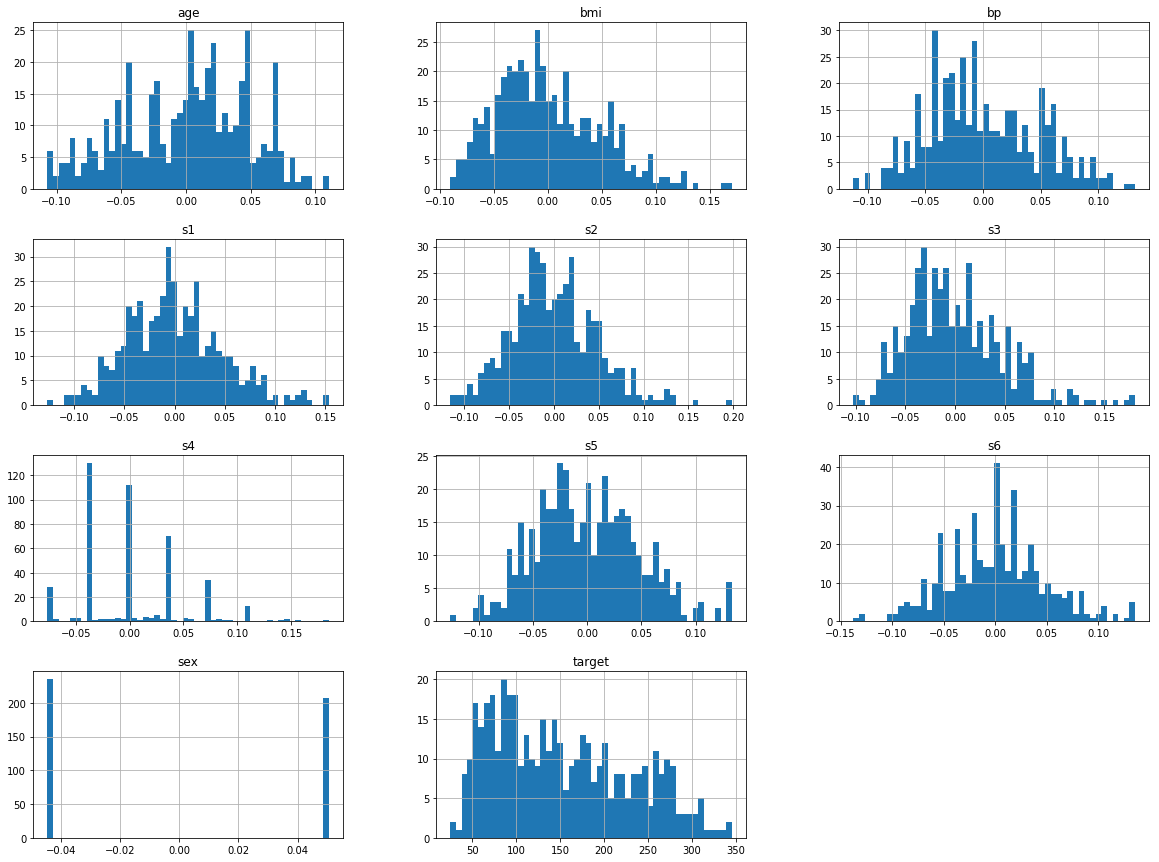

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [36]:
corr_matrix = data.corr()
corr_matrix["target"].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441484
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018846F232E8>,
      dtype=object)

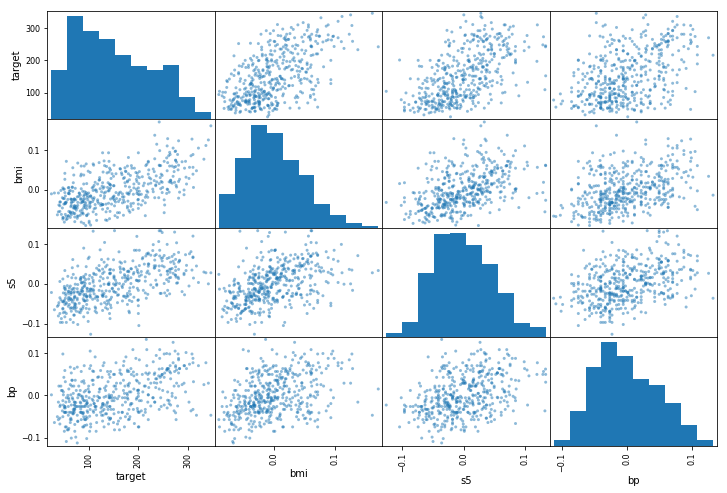

In [39]:
from pandas.plotting import scatter_matrix
attributes=["target","bmi","s5","bp"]
scatter_matrix(data[attributes], figsize=(12, 8))


In [40]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
train_set.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027368,-0.001078,144.0
66,-0.009147,0.050680,-0.018062,-0.033214,-0.020832,0.012152,-0.072854,0.071210,0.000271,0.019633,150.0
137,0.005383,-0.044642,0.049840,0.097616,-0.015328,-0.016345,-0.006584,-0.002592,0.017037,-0.013504,280.0
245,-0.027310,-0.044642,-0.035307,-0.029771,-0.056607,-0.058620,0.030232,-0.039493,-0.049868,-0.129483,125.0
31,-0.023677,-0.044642,-0.065486,-0.081414,-0.038720,-0.053610,0.059685,-0.076395,-0.037128,-0.042499,59.0


In [41]:
x_train=train_set.drop(["target"], axis=1)
y_train=train_set["target"]

x_test=test_set.drop(["target"], axis=1)
y_test=test_set["target"]

In [115]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_reg.intercept_, lin_reg.coef_

(151.3456553477407,
 array([  37.90031426, -241.96624835,  542.42575342,  347.70830529,
        -931.46126093,  518.04405547,  163.40353476,  275.31003837,
         736.18909839,   48.67112488]))

In [116]:
from sklearn.metrics import mean_squared_error
y_train_pred = lin_reg.predict(x_train)
lin_mse = mean_squared_error(y_train, y_train_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

53.55881425327268

In [117]:
y_test_pred = lin_reg.predict(x_test)
lin_mse = mean_squared_error(y_test, y_test_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

53.85325698491441

In [45]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [46]:
y_train_pred = tree_reg.predict(x_train)
tree_mse = mean_squared_error(y_train, y_train_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [48]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [74.30156272 98.95299108 87.36227256 93.35783692 77.20880779 76.68432509
 80.14076901 90.0396738  75.67694497 81.02662702]
Mean: 83.47518109454913
Standard deviation: 8.018080657034034


In [49]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [50]:
y_train_pred = forest_reg.predict(x_train)
forest_mse = mean_squared_error(y_train, y_train_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

23.900574269772875

In [51]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, x_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [50.17651343 71.3569587  52.45741924 76.91722638 60.82066848 48.07961849
 58.23037254 60.91443882 58.93507566 62.74770115]
Mean: 60.06359928984624
Standard deviation: 8.508494114402016


In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30, 100, 200, 500], 'max_features': [2, 4, 6]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10, 30, 100, 200, 500], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30, 100, 200, 500], 'max_features': [2, 4, 6]}, {'bootstrap': [False], 'n_estimators': [3, 10, 30, 100, 200, 500], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [57]:
#The best hyperparameter combination found:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 200}

In [58]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [59]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

68.34049572081473 {'max_features': 2, 'n_estimators': 3}
62.15593522171571 {'max_features': 2, 'n_estimators': 10}
60.0492699552565 {'max_features': 2, 'n_estimators': 30}
58.77807036719266 {'max_features': 2, 'n_estimators': 100}
58.28622142681148 {'max_features': 2, 'n_estimators': 200}
58.083757177677086 {'max_features': 2, 'n_estimators': 500}
64.4850037345233 {'max_features': 4, 'n_estimators': 3}
59.99318067951828 {'max_features': 4, 'n_estimators': 10}
58.71173737107961 {'max_features': 4, 'n_estimators': 30}
57.731508710729166 {'max_features': 4, 'n_estimators': 100}
57.65087006141822 {'max_features': 4, 'n_estimators': 200}
57.77282038189055 {'max_features': 4, 'n_estimators': 500}
65.83646912841083 {'max_features': 6, 'n_estimators': 3}
61.802406968354816 {'max_features': 6, 'n_estimators': 10}
58.99930754543154 {'max_features': 6, 'n_estimators': 30}
58.024923020211034 {'max_features': 6, 'n_estimators': 100}
57.83248074182484 {'max_features': 6, 'n_estimators': 200}
57.8449

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018847C6E2E8>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018847C6EF60>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [62]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

58.406244655147006 {'max_features': 7, 'n_estimators': 180}
59.81569542309689 {'max_features': 5, 'n_estimators': 15}
58.42594584850479 {'max_features': 3, 'n_estimators': 72}
59.89586858258709 {'max_features': 5, 'n_estimators': 21}
58.65872072211811 {'max_features': 7, 'n_estimators': 122}
58.311008273457 {'max_features': 3, 'n_estimators': 75}
58.495359844551736 {'max_features': 3, 'n_estimators': 88}
58.683892916359056 {'max_features': 5, 'n_estimators': 100}
58.076002187575554 {'max_features': 3, 'n_estimators': 150}
70.96419118537814 {'max_features': 5, 'n_estimators': 2}


In [63]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.05910708, 0.01180381, 0.27613642, 0.11357702, 0.05929228,
       0.0645496 , 0.0729966 , 0.05502876, 0.20596912, 0.08153932])

In [64]:
sorted(zip(feature_importances, x_train.columns), reverse=True)

[(0.2761364169117322, 'bmi'),
 (0.20596912105163934, 's5'),
 (0.11357702220492659, 'bp'),
 (0.08153931682419788, 's6'),
 (0.0729965979636875, 's3'),
 (0.06454959764385261, 's2'),
 (0.059292281464635464, 's1'),
 (0.05910707632427266, 'age'),
 (0.05502875602077466, 's4'),
 (0.011803813590281152, 'sex')]

In [66]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(x_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

53.57629106279142

In [81]:
final_model.score(x_test, y_test)

0.45822258397022775

In [67]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(x_train, y_train)
y_test_pred = bag_clf.predict(x_test)

final_mse = mean_squared_error(y_test, y_test_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

66.90669337202017

In [69]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train, y_train)
y_test_pred = tree_clf.predict(x_test)
final_mse = mean_squared_error(y_test, y_test_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

80.73100013020074

In [70]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(x_train, y_train)
y_test_pred = ada_clf.predict(x_test)
final_mse = mean_squared_error(y_test, y_test_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

90.42254118888818

In [71]:
import xgboost
xgb_reg = xgboost.XGBRegressor(random_state=42)
xgb_reg.fit(x_train, y_train)
y_test_pred = xgb_reg.predict(x_test)
final_mse = mean_squared_error(y_test, y_test_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

55.304445731676644

In [73]:
xgb_reg.score(x_test, y_test)

0.42270779266669334

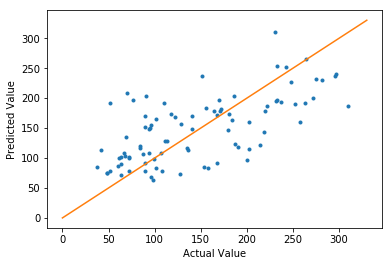

In [80]:
plt.plot(y_test, y_test_pred, '.')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

In [100]:
#wonder how the raw data compares to the trasnformed
import urllib.request
data_unreg = pd.read_csv("C:/Users/dcb/Health-Care-Cost-Prediction/Data Raw.csv")
train_unreg_set, test_unreg_set = train_test_split(data_unreg, test_size=0.2, random_state=42)

In [108]:
x_unreg_train=train_unreg_set.drop(["Y"], axis=1)
y_unreg_train=train_unreg_set["Y"]

x_unreg_test=test_unreg_set.drop(["Y"], axis=1)
y_unreg_test=test_unreg_set["Y"]

In [109]:
xgb_unreg = xgboost.XGBRegressor(random_state=42)
xgb_unreg.fit(x_unreg_train, y_unreg_train)
y_unreg_test_pred = xgb_unreg.predict(x_unreg_test)

In [110]:
unreg_mse = mean_squared_error(y_unreg_test, y_unreg_test_pred)
unreg_rmse = np.sqrt(final_mse)
unreg_rmse

55.304445731676644

In [111]:
lin_unreg = LinearRegression()
lin_unreg.fit(x_unreg_train, y_unreg_train)
y_unreg_train_pred = lin_unreg.predict(x_unreg_train)
lin_mse = mean_squared_error(y_unreg_train, y_unreg_train_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

53.55884336723094

In [118]:
y_unreg_test_pred = lin_unreg.predict(x_unreg_test)
lin_mse = mean_squared_error(y_unreg_test, y_unreg_test_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

53.85344583676591

In [119]:
lin_reg.score(x_test, y_test)

0.45260660216173776

In [121]:
lin_unreg.score(x_unreg_test, y_unreg_test)

0.4526027629719198